### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
#                  alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
DF = pd.read_csv(data_url)

In [7]:
DF

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,99,99,99,102,102,102,102,102,103,103
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,301,301,301,301,301,301,301,301,300,300
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,55,55,55,55,55,55,55,55,55,55
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,58,58,58,58,58,58,58,58,58,58
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,131,131,132,132,132,132,132,133,134,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,9,9,9,9,9,9,9,9,9,9
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,12,12,12,12,12,12,12,12,12,12
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,26,26,26,26,26,26,26,26,26,26


In [8]:
DF = DF.groupby('Province_State').sum()
Population = DF.Population.copy()
DF = DF.drop(columns = ['Lat', 'Long_', 'UID', 'code3', 'FIPS', 'Population']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

In [9]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
#           'S.Korea': 'lightgreen', 
          'France': 'violet', 
          'Poland': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

In [10]:
Countries = list(zip(DF.columns.tolist(), DF.iloc[-1].tolist()))
Countries.sort(key=lambda t: t[1])
Countries = [c[0] for c in Countries[-12:]]
Countries

['Massachusetts',
 'Michigan',
 'Ohio',
 'Georgia',
 'Illinois',
 'New Jersey',
 'Pennsylvania',
 'Florida',
 'Texas',
 'New York',
 'California',
 'World']

In [11]:
colors = {d: c for d, c in zip(Countries, list(colors.values())[1:])}
colors

{'Massachusetts': 'Blue',
 'Michigan': 'Black',
 'Ohio': 'red',
 'Georgia': 'yellow',
 'Illinois': 'grey',
 'New Jersey': 'brown',
 'Pennsylvania': 'Purple',
 'Florida': 'violet',
 'Texas': 'lime',
 'New York': 'Teal',
 'California': 'cyan',
 'World': 'Orange'}

In [12]:
Deaths = DF.copy()
Deaths[Countries].tail(5)

Province_State,Massachusetts,Michigan,Ohio,Georgia,Illinois,New Jersey,Pennsylvania,Florida,Texas,New York,California,World
2021-04-05,17325,17282,18741,19212,23665,24649,25180,33710,48729,50706,59799,555711
2021-04-06,17337,17343,18741,19238,23673,24700,25217,33780,48815,50751,59887,556546
2021-04-07,17358,17373,18741,19305,23702,24749,25269,33822,48918,50843,59993,559116
2021-04-08,17366,17450,18741,19374,23740,24783,25312,33906,49017,50898,60129,560116
2021-04-09,17376,17479,18827,19424,23762,24826,25358,33968,49121,50977,60286,561074


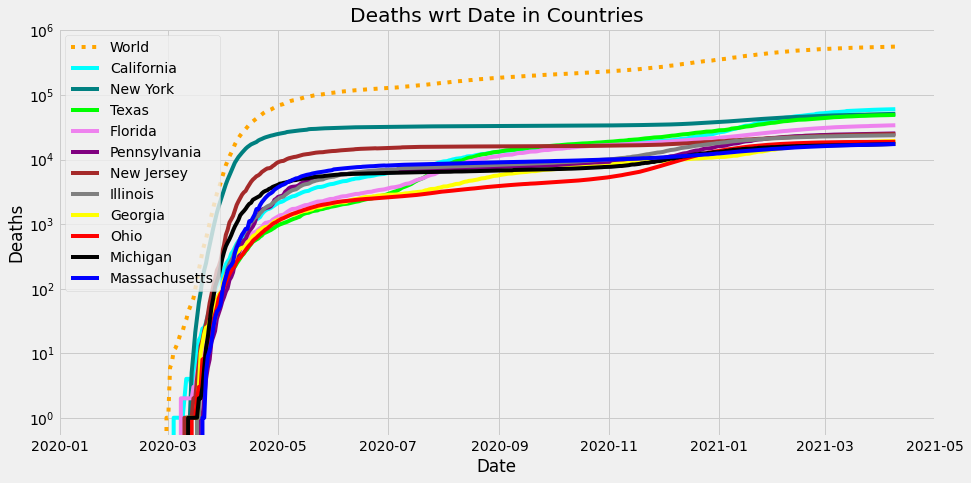

In [13]:
plotter(Deaths, 'Deaths')

In [14]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Province_State,Massachusetts,Michigan,Ohio,Georgia,Illinois,New Jersey,Pennsylvania,Florida,Texas,New York,California,World
2021-04-05,44,23,0,0,11,12,7,36,32,73,88,515
2021-04-06,12,61,0,26,8,51,37,70,86,45,88,835
2021-04-07,21,30,0,67,29,49,52,42,103,92,106,2570
2021-04-08,8,77,0,69,38,34,43,84,99,55,136,1000
2021-04-09,10,29,86,50,22,43,46,62,104,79,157,958


In [15]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Province_State,Massachusetts,Michigan,Ohio,Georgia,Illinois,New Jersey,Pennsylvania,Florida,Texas,New York,California,World
2021-04-05,29.81,25.62,2.47,38.81,20.20,29.53,25.54,63.59,90.16,83.52,138.69,829.48
2021-04-06,27.58,30.04,2.16,37.21,18.67,32.21,26.97,64.39,89.64,78.70,132.35,830.17
2021-04-07,26.76,30.04,1.89,40.93,19.96,34.31,30.10,61.60,91.31,80.36,129.06,1047.65
2021-04-08,24.42,35.91,1.66,44.44,22.22,34.27,31.71,64.40,92.27,77.19,129.93,1041.69
2021-04-09,22.61,35.04,12.20,45.14,22.19,35.36,33.50,64.10,93.74,77.42,133.31,1031.23


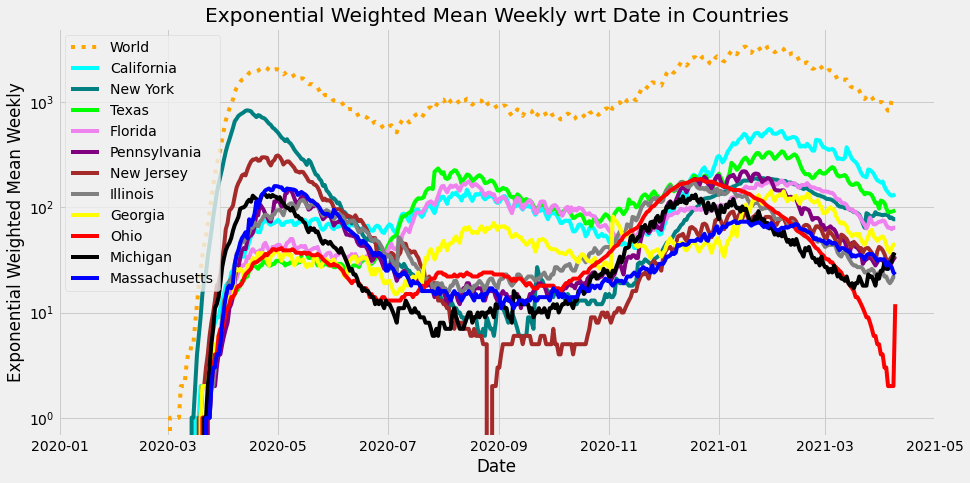

In [16]:
plotter(np.round(AVG), name)

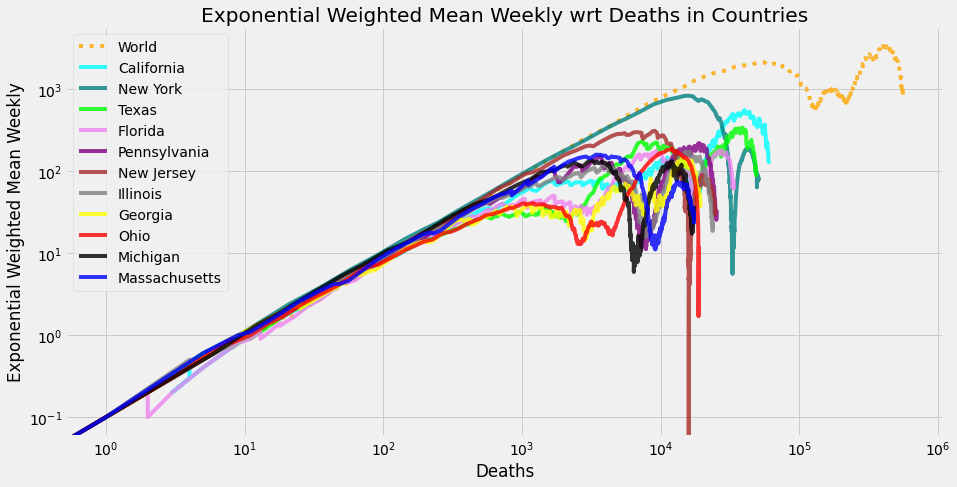

In [17]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

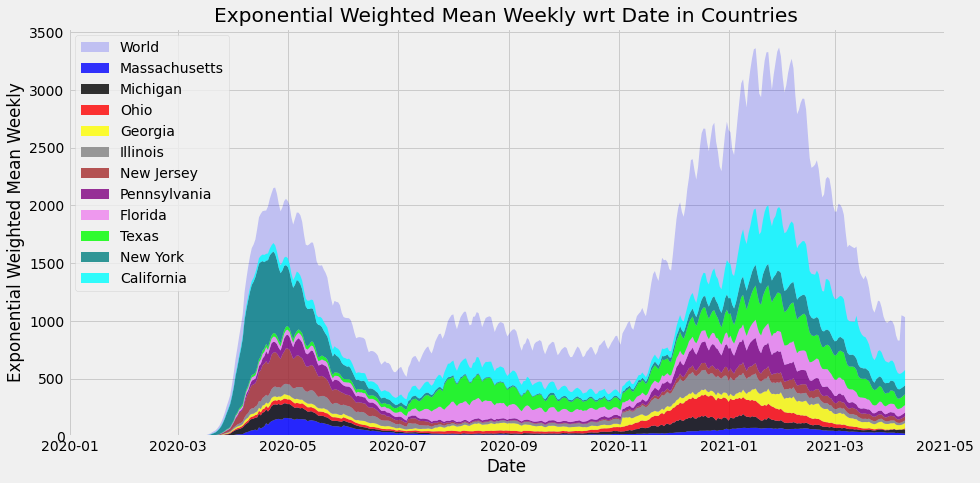

In [18]:
stackplotter(AVG, name)

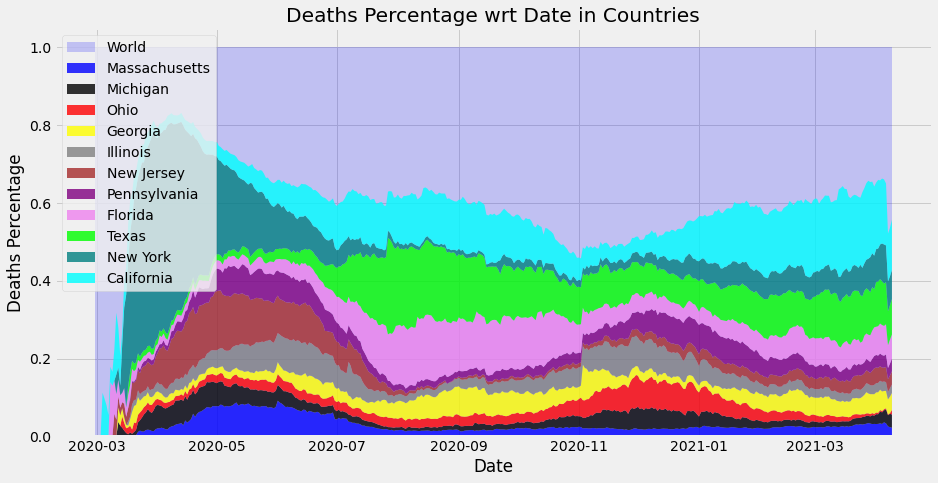

In [19]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [20]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1
Reproductivity[Countries].iloc[-1]
# plt.barh(
#     Countries,
#     Reproductivity[Countries].iloc[-1],
#     color = colors.values()
# )

Province_State
Massachusetts    0.6232
Michigan         1.5755
Ohio             1.0000
Georgia          0.7685
Illinois         0.8709
New Jersey       0.9030
Pennsylvania     1.0148
Florida          0.8024
Texas            0.6949
New York         0.9410
California       0.5892
World            0.8827
Name: 2021-04-09 00:00:00, dtype: float64

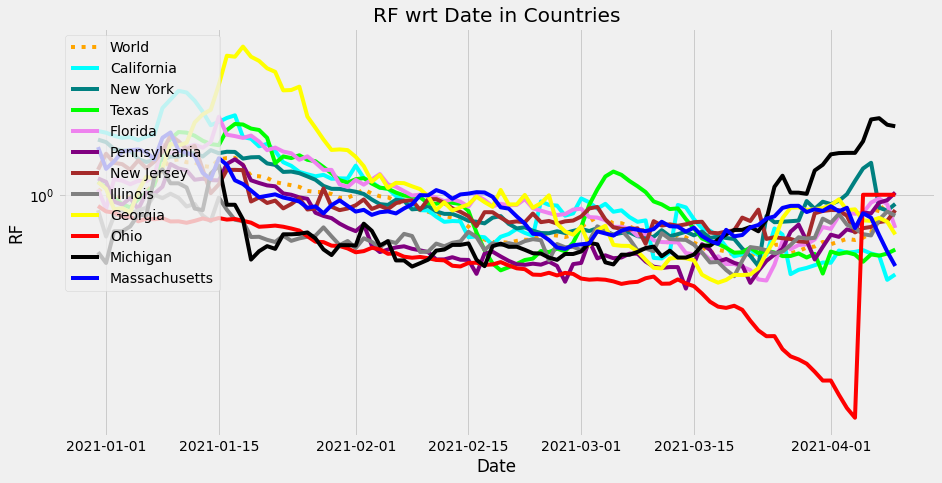

In [21]:
plotter(Reproductivity.tail(100), 'RF')

### Time Adjusted for starting day

In [22]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

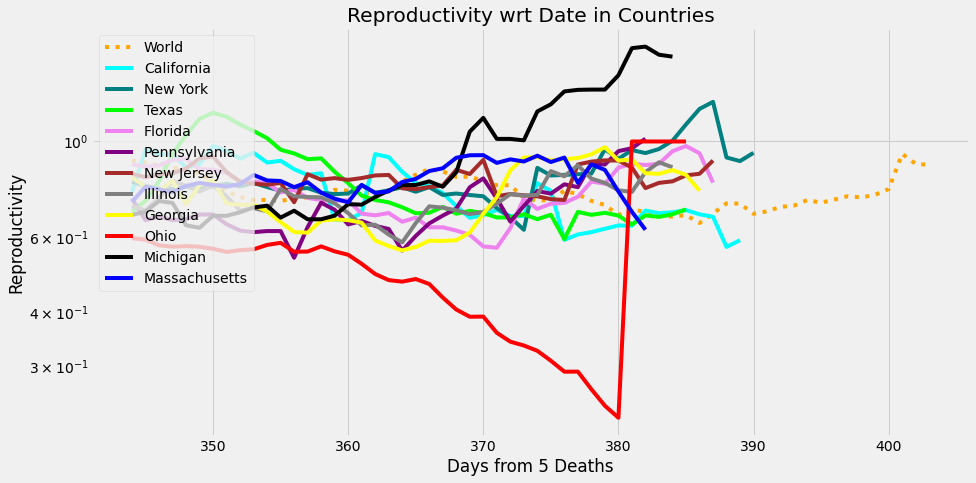

In [23]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

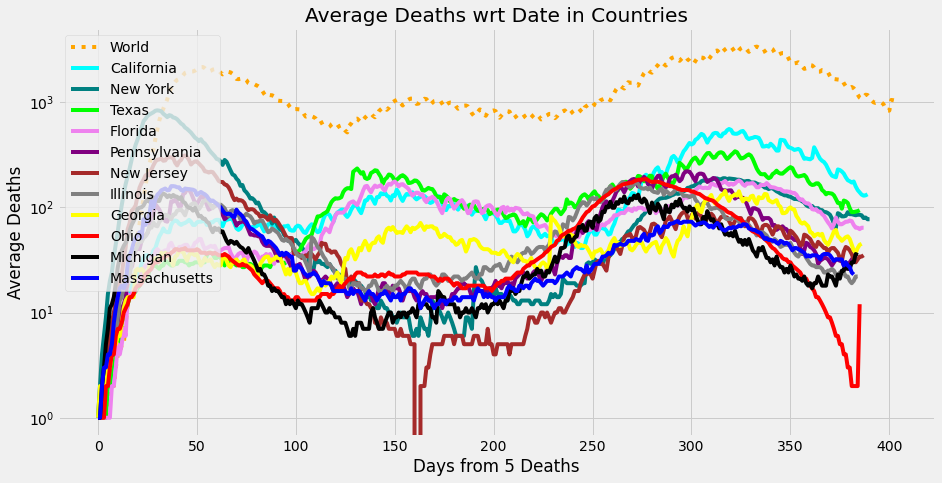

In [24]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

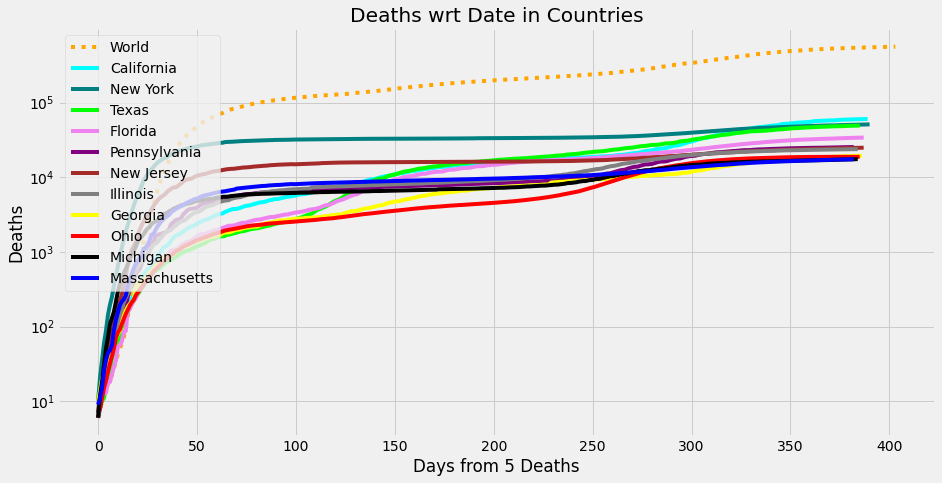

In [25]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [26]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Population'] = Population
# LastDay_DF.loc['World']['Population'] = Population.sum()
LastDay_DF['Per1000D'] = LastDay_DF.Deaths/LastDay_DF.Population*1000

In [27]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
World,561074,958,981.86,1031.23,0.8827,NaN,NaN
California,60286,157,96.00,133.31,0.5892,39512223.0,1.525756
New York,50977,79,74.14,77.42,0.9410,19453561.0,2.620446
Texas,49121,104,74.57,93.74,0.6949,28995881.0,1.694068
Florida,33968,62,54.57,64.10,0.8024,21477737.0,1.581545
Pennsylvania,25358,46,31.86,33.50,1.0148,12801989.0,1.980786
New Jersey,24826,43,30.14,35.36,0.9030,8882190.0,2.795031
Illinois,23762,22,19.43,22.19,0.8709,12671821.0,1.875184
Georgia,19424,50,35.43,45.14,0.7685,10617423.0,1.829446


In [28]:
LastDay_DF[LastDay_DF['Weekly_Deaths']>60].sort_values('Weekly_Deaths', ascending = False)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
World,561074,958,981.86,1031.23,0.8827,NaN,NaN
Oklahoma,6669,0,245.14,170.03,13.6024,3956971.0,1.685380
California,60286,157,96.00,133.31,0.5892,39512223.0,1.525756
Texas,49121,104,74.57,93.74,0.6949,28995881.0,1.694068
New York,50977,79,74.14,77.42,0.9410,19453561.0,2.620446


In [29]:
LastDay_DF.sort_values('Per1000D', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
Grand Princess,3,0,0.00,0.00,1.0000,0.0,inf
New Jersey,24826,43,30.14,35.36,0.9030,8882190.0,2.795031
New York,50977,79,74.14,77.42,0.9410,19453561.0,2.620446
Massachusetts,17376,10,18.14,22.61,0.6232,6892503.0,2.521000
Rhode Island,2638,2,1.14,2.10,1.0000,1059361.0,2.490180
Mississippi,7086,4,5.00,6.63,1.0000,2976149.0,2.380929
Arizona,17062,7,10.43,15.81,0.4795,7278717.0,2.344094
Connecticut,7944,4,5.71,6.04,1.0000,3565287.0,2.228152
South Dakota,1946,7,1.14,1.52,1.0000,884659.0,2.199718


### Pie Chart

In [30]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:]
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  981


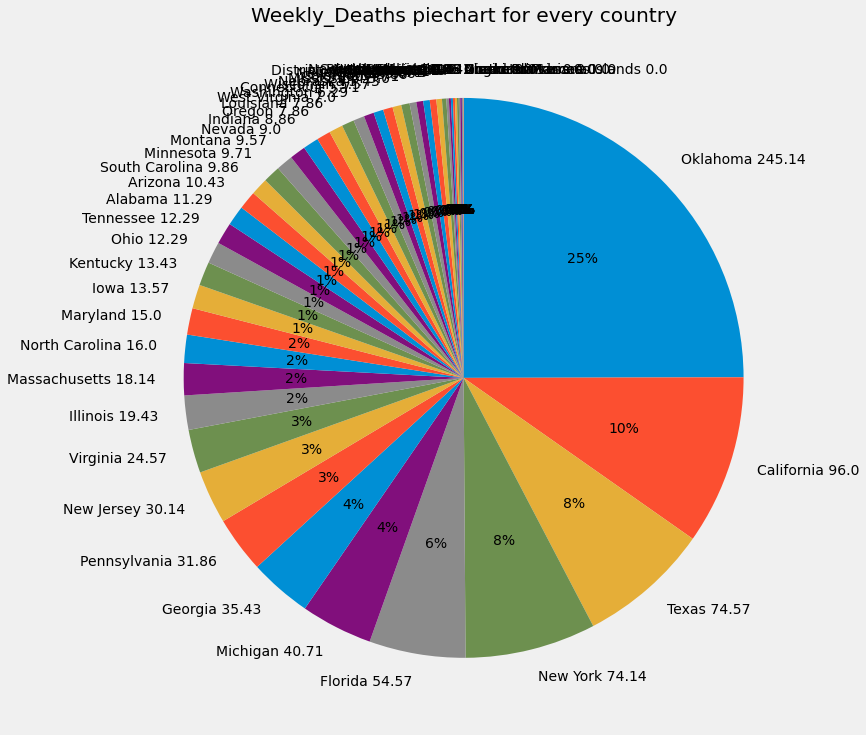

In [31]:
piechart('Weekly_Deaths')

World total:  958


ValueError: Wedge sizes 'x' must be non negative values

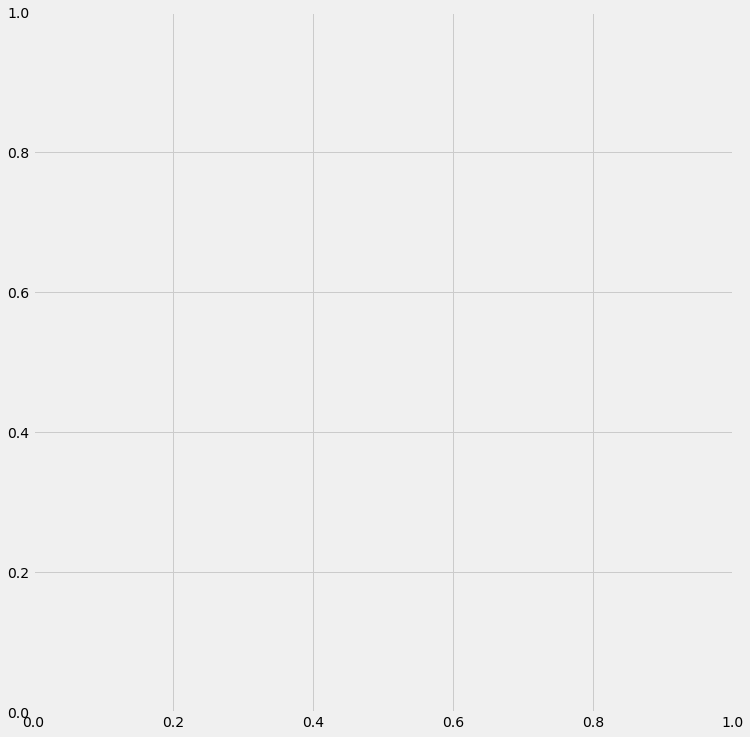

In [32]:
piechart('Daily_Deaths')

In [ ]:
print('Today\'s Date: ', dt.datetime.now().date())

In [ ]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/0.002

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>